# Automatically Export Maps: Projected Flooding from Sea Level Rise
This notebook is designed to run in ArcGIS Pro. The data are from the [NOAA Office for Coastal Management's (OCM) Sea Level Rise Viewer](https://coast.noaa.gov/digitalcoast/tools/slr.html), with each layer having names of the format `FL_SE_slr_depth_XXft.tif` where XX is the projected sea level rise in feet. The code exports each layer as a separate image, which are then combined into a GIF.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image
%matplotlib inline

In [2]:
def download_maps(project, show_labels=True):
    
    # Get Layout with map frame and description elements
    lyt = project.listLayouts('Layout')[0]
    description = lyt.listElements('TEXT_ELEMENT', 'description')[0]
    m = project.listMaps("Map")[0]

    # Get list of layers begining with FL_SE_slr_depth_
    layers = m.listLayers('FL_SE_slr_depth_*')
    
    # Show or hide label based on function input
    if show_labels == True:
        description.visible = True
    else:
        description.visible = False
    
    for layer in layers:
        # Show layer on map
        layer.visible = True
        
        # Get sea level rise amount (0.5 to 10. feet) from layer name
        sea_level = layer.name[16:19]

        print(f"Exporting image: {sea_level.replace('_', '.')} ft")

        # Include text in the lower-right corner to indicate sea level rise in feet
        if show_labels == True:
            description.text = f"Sea Level Rise: {sea_level.replace('_', '.')} Feet"

        # Export map to PNG
        filename = f"maps/fl_everglades_slr_depth_{sea_level}ft.png"
        lyt.exportToPNG(filename)

        # Hide layer on map (to not show on the next map)
        layer.visible = False

In [3]:
# Load current ArcGIS Project
p = arcpy.mp.ArcGISProject("current")

download_maps(p, show_labels=True)

Exporting image: 10. ft
Exporting image: 9.5 ft
Exporting image: 9.0 ft
Exporting image: 8.5 ft
Exporting image: 8.0 ft
Exporting image: 7.5 ft
Exporting image: 7.0 ft
Exporting image: 6.5 ft
Exporting image: 6.0 ft
Exporting image: 5.5 ft
Exporting image: 5.0 ft
Exporting image: 4.5 ft
Exporting image: 4.0 ft
Exporting image: 3.5 ft
Exporting image: 3.0 ft
Exporting image: 2.5 ft
Exporting image: 2.0 ft
Exporting image: 1.5 ft
Exporting image: 1.0 ft
Exporting image: 0.5 ft
Exporting image: 0.0 ft


# Create GIF

In [8]:
# List all sea levels
sea_levels = ['0_0', '0_5', '1_0', '1_5', '2_0', '2_5', '3_0', '3_5', '4_0', '4_5', '5_0', '5_5', '6_0', '6_5', '7_0', '7_5', '8_0', '8_5', '9_0', '9_5', '10_']

# Get PNG image for each sea level
image_paths = [f"maps/fl_everglades_slr_depth_{sea_level}ft.png" for sea_level in sea_levels]
all_images = [Image.open(img) for img in image_paths]

# Create 21-second GIF that loops
seconds = 21
all_images[0].save("fl_everglades_slr_depth_timelapse.gif", format='gif', append_images=all_images[1:], save_all=True, duration=seconds*1000/len(sea_levels), loop=0)

# Create Image Grid

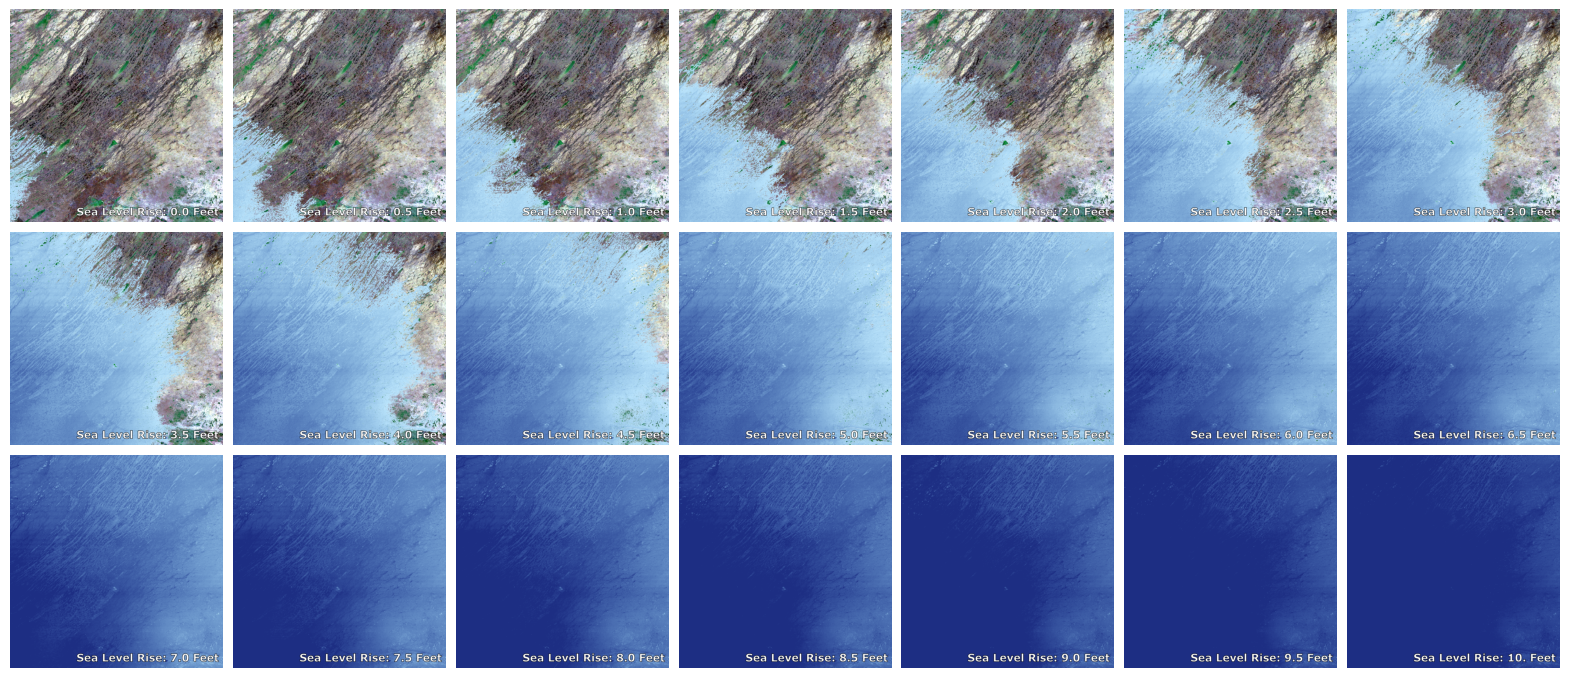

In [13]:
fig = plt.figure(figsize=(20, 10))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(3, 7),  # creates 7x3 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, all_images):
    ax.imshow(im)
    ax.grid(False)
    ax.axis('off')

plt.show()

In [14]:
fig.savefig("fl_everglades_slr_depth_frames.png", format='png', bbox_inches='tight', transparent=True)